In [11]:
import numpy as np
import scipy as sci
from PIL import Image

import scipy.fft as fft

import matplotlib.pyplot as plt

import cv2 as cv

# FUNCTION`S CREATED FROM   'INTRO'
def middle_section(arr):
    """
    for plt.plot. Can be colored or not.
    """
    mid_row=int((arr.shape)[0]/2)
    if len(arr.shape) == 3 :
        return (arr[mid_row,:,0:1]).flatten()
    else:
        return((arr[mid_row,:]).flatten())
def convolve_2d(arr,flt):
    """
    filter designed to be 3x3
    """
    conv=np.empty(((arr.shape)[0]-2,(arr.shape)[1]-2))
    for i in (range(arr.shape[0]))[1:-1]:
        in1=np.convolve(arr[i-0,:],flt[0,:],'valid')
        in2=np.convolve(arr[i,:],flt[1,:],'valid')
        in3=np.convolve(arr[i+1,:],flt[2,:],'valid')
        conv[i-1,:]=(in1+in2+in3)
    return conv

def im_asrankn(arr,n):
    """
    pull the first n rank-1 part of the array. with SVD.
    designed for NON-colored image
    """
    U,E,V=np.linalg.svd(arr)
    ans=np.zeros(arr.shape)
    for i in range(n):
        ans+=(U[:,i:i+1]@V[i:i+1,:])*E[i]
    return ans
def gaussian_filter2d(piv,mean=0,sigma=1):
    loc=np.square((np.arange(-(piv-1)/2,((piv-1)/2)+1)).reshape((piv,1)))
    temp=np.concatenate(piv*[loc],axis=1)
    x=temp+temp.T
    z=(1/((2*np.pi)*(sigma**2)))*np.exp((-1*np.square(x-mean))/(2*np.square(sigma)))
    return z/np.linalg.norm(z)

rng=np.random.default_rng(seed=42)

ccarr1=Image.open('street.jpg')

In [12]:
np.array(ccarr1).shape

(800, 800, 3)

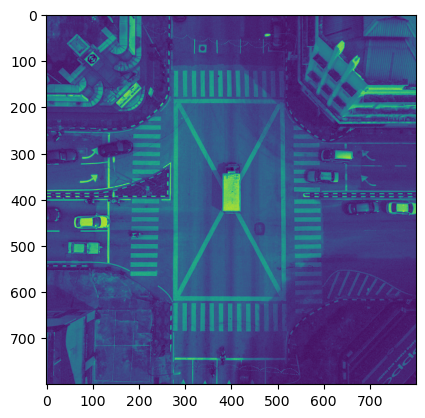

In [7]:
plt.imshow(np.array(ccarr1)[:,:,1])

In [9]:
d1cc=np.mean(ccarr1,-1)[:,:800]

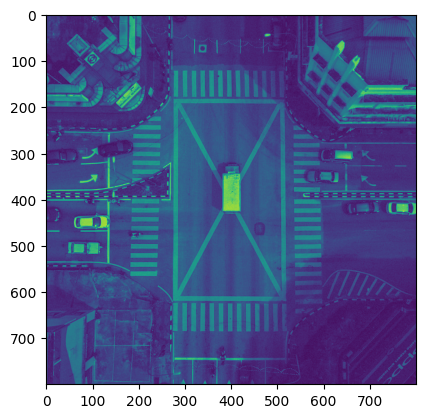

In [10]:
plt.imshow(d1cc)

In [3]:
square=np.zeros((81,81))
square[40-5:40+5,40-5:40+5]=1
impshift=np.zeros((81,81))
impshift[15,65]=1


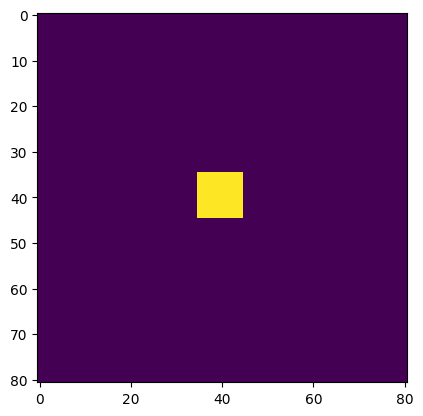

In [4]:
plt.imshow((np.real(square)))

In [5]:
fft_square=fft.fftshift(fft.fft2(square))
fft_impshift=fft.fftshift(fft.fft2(impshift))

In [6]:
temp3=fft_square*fft_impshift

In [7]:
z=(fft.ifftshift(fft.ifft2(temp3)))

In [10]:
mag=np.sqrt(z.real**2+z.imag**2)

In [29]:
phase=np.arctan2(fft_impshift.imag,fft_impshift.real)

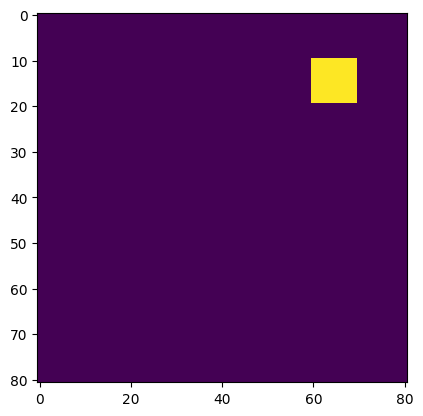

In [36]:
plt.imshow(mag)

In [337]:
d1cc.shape

(700, 700)

In [81]:
d1cc=np.mean(ccarr1,-1)

In [82]:
d1cc=(d1cc-np.mean(d1cc))/np.std(d1cc)

(<matplotlib.image.AxesImage at 0x7f6f859300d0>, (60, 60))

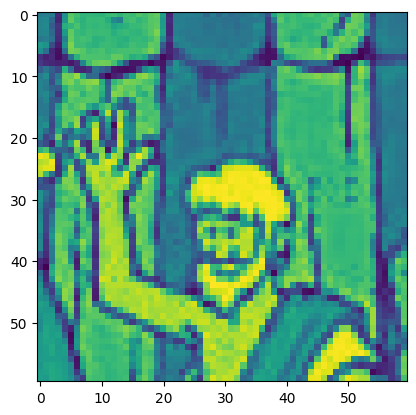

In [83]:
template=d1cc[135:195,330:390]
plt.imshow(template),template.shape

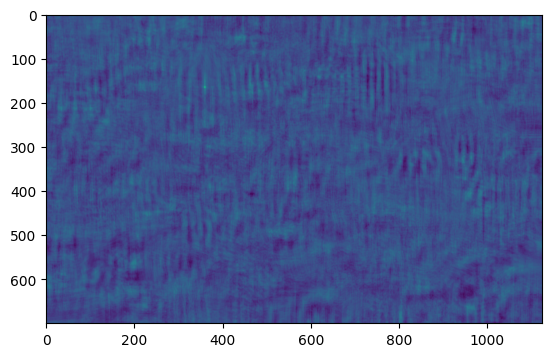

In [7]:
z=sci.ndimage.correlate(d1cc,template)
plt.imshow(z)

In [9]:
np.unravel_index(np.argmax(z),z.shape)

(165, 360)

In [10]:
z.shape

(700, 1125)

In [12]:
rescaled=cv.resize(template,d1cc.shape,interpolation=cv.INTER_AREA)

In [17]:
fft_temp=(fft.fft2(rescaled,d1cc.shape))
fft_im=(fft.fft2(d1cc))
fft_cross=fft_temp*fft_im
cross=np.real(fft.ifftshift(fft.ifft2(fft_cross)))

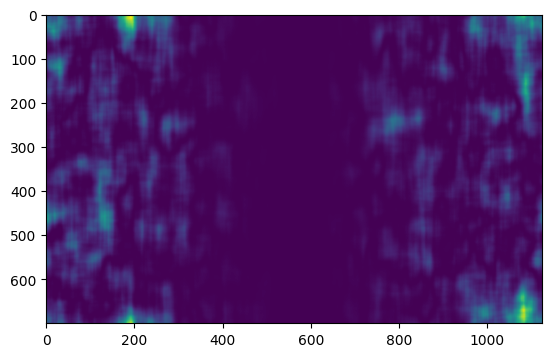

In [21]:
plt.imshow(cross*cross.conj())


In [19]:
np.unravel_index(np.argmax(cross),cross.shape)

(8, 192)